## **TASK 4 : EMPIRICAL ANALYSIS OF ETFs**

### Chosen Sector ETF - XLU

XLU is a **Utilities Select Sector SPDR Fund**. The Utilities Index primarily provides companies that produce, generate, transmit or distribute electricity or natural gas. The component companies include NextEra Energy, Duke, Southern, Sempra and Dominion.

The list of holdings is pulled from [this website](https://www.sectorspdrs.com/mainfund/xlu). The holdings are sorted by weight in the descending order.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yfin
import numpy as np
import numpy.linalg as LA

In [14]:
#Displaying the portfolio holdings of XLE ETF
df = pd.read_csv(r"C:\Users\ADEKUNLE\Downloads\index-holdings-xlu.csv")
display(df)
holdings_top_30 = df.iloc[1:31,0]
holdings_top_30.info() 
print("\n The below symbols are of the top 30 holdings of XLU ETF")
holdings_top_30.head()

,Index Holdings and weightings as of 6:38 PM ET 09/30/2025,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
1,NEE,NextEra Energy Inc,11.60%,75.49,-0.72,-0.94%,9.39 M,61.72 - 86.10
2,SO,Southern Co,7.78%,94.77,+0.86,+0.92%,7.48 M,80.46 - 96.44
3,CEG,Constellation Energy Corp,7.67%,329.07,-5.20,-1.55%,2.16 M,161.35 - 357.00
4,DUK,Duke Energy Corp,7.18%,123.75,+0.95,+0.77%,3.72 M,105.20 - 127.85
5,VST,Vistra Corp.,4.66%,195.92,-2.02,-1.02%,5.83 M,90.51 - 219.82
6,AEP,American Electric Power,4.49%,112.50,+2.72,+2.48%,4.32 M,89.91 - 115.36
7,SRE,Sempra,4.38%,89.98,+0.28,+0.31%,3.51 M,61.90 - 95.77
8,D,Dominion Energy Inc,3.90%,61.17,+0.25,+0.41%,2.83 M,48.07 - 62.46
9,XEL,Xcel Energy Inc,3.56%,80.65,+0.60,+0.75%,4.01 M,62.12 - 80.07


<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 1 to 30
Series name: Index Holdings and weightings as of 6:38 PM ET 09/30/2025
Non-Null Count  Dtype 
--------------  ----- 
30 non-null     object
dtypes: object(1)
memory usage: 372.0+ bytes

 The below symbols are of the top 30 holdings of XLU ETF


1    NEE
2     SO
3    CEG
4    DUK
5    VST
Name: Index Holdings and weightings as of 6:38 PM ET 09/30/2025, dtype: object

In [15]:
#Dropping null values if any
holdings_top_30 = holdings_top_30.dropna().to_list()
display(holdings_top_30)

['NEE',
 'SO',
 'CEG',
 'DUK',
 'VST',
 'AEP',
 'SRE',
 'D',
 'XEL',
 'EXC',
 'PEG',
 'ETR',
 'WEC',
 'ED',
 'PCG',
 'NRG',
 'DTE',
 'AEE',
 'PPL',
 'ATO',
 'AWK',
 'ES',
 'CNP',
 'FE',
 'CMS',
 'EIX',
 'NI',
 'EVRG',
 'LNT',
 'PNW']

### 4C. Compute the daily returns
The percentage change in daily prices is used for computing daily returns. The plot of daily returns is displayed in the next cell below

In [18]:
import yfinance as yf

holding_prices = yf.download(holdings_top_30, start='2025-04-01', end='2025-10-01', auto_adjust = False)['Adj Close'] # Downloading daily data
holding_prices.info() #Shows the price data is available for all 6 months for top 30 holdings

holding_prices.index = pd.to_datetime(holding_prices.index) # Setting index as datetime object

holding_daily_returns = holding_prices.dropna().pct_change() # Calculating daily percent returns
holding_daily_returns = holding_daily_returns.dropna()
holding_daily_returns.head() # Each column is r_{i}

[*********************100%***********************]  30 of 30 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2025-04-01 to 2025-09-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AEE     126 non-null    float64
 1   AEP     126 non-null    float64
 2   ATO     126 non-null    float64
 3   AWK     126 non-null    float64
 4   CEG     126 non-null    float64
 5   CMS     126 non-null    float64
 6   CNP     126 non-null    float64
 7   D       126 non-null    float64
 8   DTE     126 non-null    float64
 9   DUK     126 non-null    float64
 10  ED      126 non-null    float64
 11  EIX     126 non-null    float64
 12  ES      126 non-null    float64
 13  ETR     126 non-null    float64
 14  EVRG    126 non-null    float64
 15  EXC     126 non-null    float64
 16  FE      126 non-null    float64
 17  LNT     126 non-null    float64
 18  NEE     126 non-null    float64
 19  NI      126 non-null    float64
 20  NRG     126 non-null    float64
 21  PCG     126 non-null

Ticker,AEE,AEP,ATO,AWK,CEG,CMS,CNP,D,DTE,DUK,...,NRG,PCG,PEG,PNW,PPL,SO,SRE,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-02,0.001689,-0.005721,0.001743,-0.005510,0.036339,-0.006388,0.003533,-0.000533,0.000580,-0.005617,...,0.044149,0.009265,0.006366,0.001574,0.001941,-0.005663,0.017887,0.040494,-0.000459,0.002545
2025-04-03,0.008330,0.012622,0.000515,0.039469,-0.112935,0.011385,0.011644,0.000356,0.010797,0.030401,...,-0.098270,-0.010327,-0.026733,-0.002305,0.002768,0.013801,-0.028967,-0.149226,-0.002848,0.017489
2025-04-04,-0.057927,-0.042434,-0.048168,-0.031127,-0.101346,-0.037346,-0.034261,-0.062578,-0.055129,-0.041274,...,-0.098739,-0.046956,-0.046842,-0.043273,-0.048855,-0.039110,-0.068571,-0.093707,-0.038423,-0.058913
2025-04-07,-0.015137,-0.027852,-0.018605,-0.033078,0.051649,-0.024075,-0.016075,-0.036033,-0.029211,-0.017405,...,0.043416,-0.021898,-0.007719,-0.016138,-0.027278,-0.019339,-0.029903,0.047109,-0.011020,-0.012226
2025-04-08,-0.001166,-0.002855,0.012340,-0.010466,0.028645,-0.010572,0.001408,-0.023018,-0.004377,-0.007787,...,-0.015360,-0.008707,0.007390,-0.008927,0.000597,-0.004128,-0.002034,-0.004869,-0.002519,-0.000298


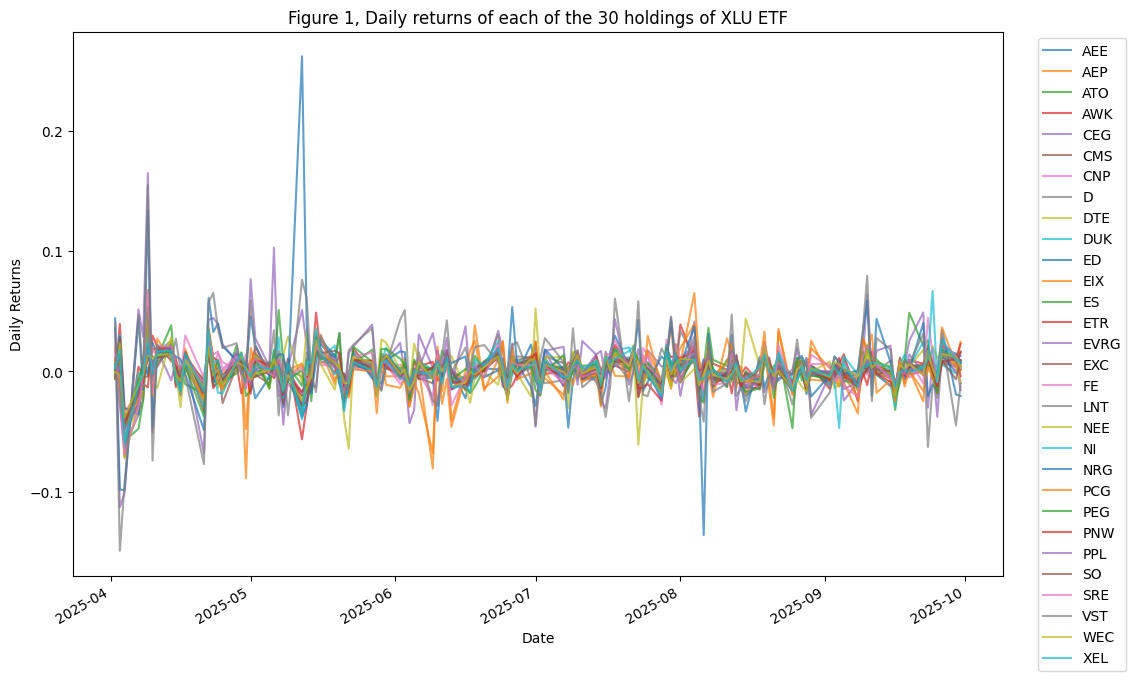

In [19]:
# Daily returns plot

holding_daily_returns.plot(figsize=(12, 8), title='Figure 1, Daily returns of each of the 30 holdings of XLU ETF', alpha=0.7) # Plot the yields
plt.legend(bbox_to_anchor=(1.03, 1))
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.show()

### 4d. Covariance Matrix

In [20]:
# Calculate covariance matrix for top 30 holdings of XLU

holding_daily_returns_covariance_matrix = holding_daily_returns.cov()
print("XLU ETF Holding top 30 holdings Covariance Matrix:")
print(holding_daily_returns_covariance_matrix)

XLU ETF Holding top 30 holdings Covariance Matrix:
Ticker       AEE       AEP       ATO       AWK       CEG       CMS       CNP  \
Ticker                                                                         
AEE     0.000120  0.000103  0.000098  0.000102  0.000089  0.000105  0.000092   
AEP     0.000103  0.000135  0.000098  0.000119  0.000049  0.000104  0.000090   
ATO     0.000098  0.000098  0.000121  0.000108  0.000073  0.000092  0.000085   
AWK     0.000102  0.000119  0.000108  0.000212 -0.000104  0.000115  0.000081   
CEG     0.000089  0.000049  0.000073 -0.000104  0.001067  0.000034  0.000096   
CMS     0.000105  0.000104  0.000092  0.000115  0.000034  0.000124  0.000086   
CNP     0.000092  0.000090  0.000085  0.000081  0.000096  0.000086  0.000115   
D       0.000119  0.000109  0.000101  0.000112  0.000132  0.000115  0.000095   
DTE     0.000113  0.000103  0.000103  0.000105  0.000100  0.000116  0.000096   
DUK     0.000095  0.000109  0.000088  0.000122  0.000010  0.000099  0

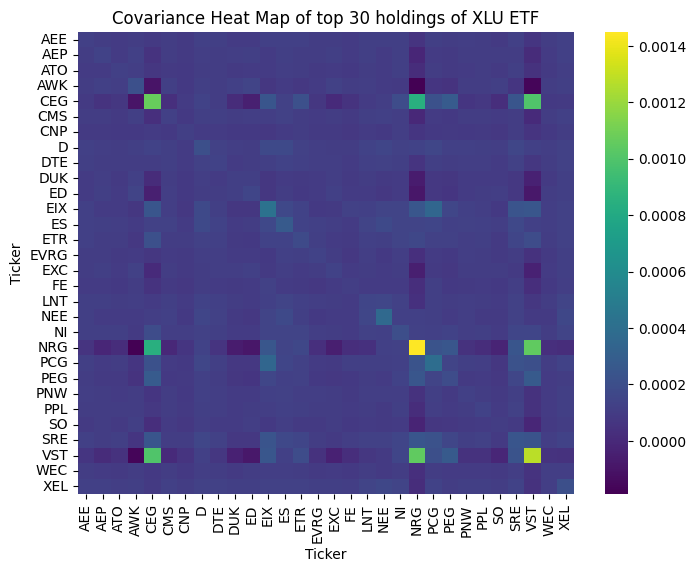

In [21]:
# The heatmap is also provided for visualization of covariance across 30 holdings
plt.figure(figsize=(8, 6))
sns.heatmap(holding_daily_returns_covariance_matrix, annot=False, cmap='viridis', fmt=".2f")
plt.title('Covariance Heat Map of top 30 holdings of XLU ETF')
plt.show()

### 4e. Derive Principal Components

1) To calculate the Principal components, we need dataset of standardized returns.
2) We then compute the co-variance matrix of the standardized returns.
3) We further compute the Eigenvalues and Eigenvectors of the co-variance matrix using the module linalg of numpy.
4) We then compute the dot product of standardized returns and eigenvectors to arrive at the principal components.


In [22]:
#Calculate means in the dataset
holding_daily_returns_means = holding_daily_returns.mean()
print("The Means of daily returns calculated for top 30 holdings:")
print(holding_daily_returns_means)

#Calculate standard deviations  in the dataset
holding_daily_returns_stds = holding_daily_returns.std()
print("The Standard deviations of daily returns calculated for top 30 holdings:")
print(holding_daily_returns_stds)

#Creating a standardized ETF return dataset
standardized_data = (holding_daily_returns - holding_daily_returns_means) / holding_daily_returns_stds
print("Standardized returns (first 5 rows):")
print(standardized_data.head())

The Means of daily returns calculated for top 30 holdings:
Ticker
AEE     0.000466
AEP     0.000503
ATO     0.000924
AWK    -0.000238
CEG     0.004261
CMS    -0.000022
CNP     0.000575
D       0.000958
DTE     0.000397
DUK     0.000375
ED     -0.000518
EIX    -0.000021
ES      0.001412
ETR     0.000874
EVRG    0.000996
EXC     0.000050
FE      0.001227
LNT     0.000565
NEE     0.000807
NI      0.000765
NRG     0.004723
PCG    -0.000877
PEG     0.000237
PNW    -0.000269
PPL     0.000432
SO      0.000435
SRE     0.002024
VST     0.004436
WEC     0.000596
XEL     0.001281
dtype: float64
The Standard deviations of daily returns calculated for top 30 holdings:
Ticker
AEE     0.010961
AEP     0.011639
ATO     0.010978
AWK     0.014565
CEG     0.032671
CMS     0.011152
CNP     0.010723
D       0.014240
DTE     0.011633
DUK     0.010843
ED      0.012171
EIX     0.020737
ES      0.016364
ETR     0.013284
EVRG    0.011544
EXC     0.011667
FE      0.010467
LNT     0.012079
NEE     0.019016
NI    

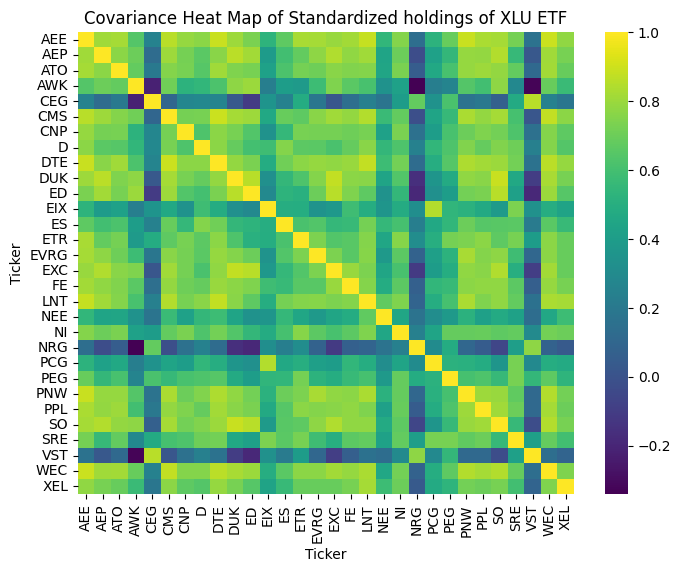

array([18.46496241,  3.89139864,  1.22281842,  0.93747645,  0.58775364,
        0.53251932,  0.40052269,  0.37666747,  0.34251019,  0.29479801,
        0.28262032,  0.26605123,  0.25884862,  0.25140197,  0.23257598,
        0.04316169,  0.05955721,  0.06573811,  0.07343677,  0.07920991,
        0.0856032 ,  0.09633656,  0.100205  ,  0.18780402,  0.12118277,
        0.12654482,  0.16487801,  0.16091796,  0.14389344,  0.14860517])

In [23]:
# Calculate covariance matrix of the standardized dataset
std_data_cov = standardized_data.cov()

# Draw a heatmap of the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(std_data_cov, cmap='viridis', fmt=".2f")
plt.title('Covariance Heat Map of Standardized holdings of XLU ETF')
plt.show()

# Calculate eigenvectors and eigenvalues of the covariance matrix od standardized returns
eigenvalues, eigenvectors = LA.eig(std_data_cov)
eigenvalues

In [24]:
principal_components = standardized_data.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5","PC_6","PC_7","PC_8","PC_9","PC_10","PC_11",
                                "PC_12","PC_13","PC_14","PC_15","PC_16","PC_17","PC_18","PC_19","PC_20","PC_21",
                                "PC_22","PC_23","PC_24","PC_25","PC_26","PC_27","PC_28","PC_29","PC_30"]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-02,-0.569037,2.469046,0.235334,0.631166,-0.018032,-0.582522,0.071405,0.244149,-0.130568,-0.135749,...,0.264157,-0.327576,0.006440,-0.223658,-0.191777,-0.172472,-0.106038,-0.636127,-0.208908,0.250045
2025-04-03,-1.540392,-8.727295,1.047585,-0.971596,1.021432,1.405375,0.632213,1.519909,0.163157,0.514126,...,0.471156,0.710843,-0.391755,-0.168649,0.076578,0.398304,-0.344561,-0.104270,0.322363,0.011624
2025-04-04,20.542376,-4.005832,1.036260,1.195777,-0.495370,0.200163,0.019997,0.129768,0.357485,0.202812,...,-0.289918,-0.437905,0.148587,0.422318,-0.079700,-0.453095,0.287290,-0.285459,0.284579,-0.656459
2025-04-07,8.549686,3.157621,-1.312556,1.074484,2.186228,0.458855,0.458073,-0.424348,-0.088244,-0.005819,...,-0.165051,0.275136,-0.220679,-1.600148,0.374906,-0.832225,-0.594231,-0.257918,0.528223,0.429991
2025-04-08,2.173291,-0.072367,-1.504088,1.671367,1.006781,-0.386675,-0.581969,-0.080192,-0.545345,-0.709070,...,0.443316,-0.245562,0.472153,-0.072137,0.069026,-0.091569,0.733344,0.208974,-0.245060,0.306440


In [25]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,31))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,18.464962,61.55%
2,3.891399,12.97%
3,1.222818,4.08%
4,0.937476,3.12%
5,0.587754,1.96%
6,0.532519,1.78%
7,0.400523,1.34%
8,0.376667,1.26%
9,0.342510,1.14%
10,0.294798,0.98%


From the analysis, we can see tht eigen value 18.46 explained 61.55% of the variation in standardized returns

In [26]:
pc1_scores = principal_components.iloc[:, 0]
correlations = {}
for i, stock in enumerate(holding_daily_returns.columns):
    corr = np.corrcoef(standardized_data.iloc[:, i], pc1_scores)[0,1]
    correlations[stock] = corr

    
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with PC1'])
correlation_df = correlation_df.sort_values(by='Correlation with PC1', ascending=False)

print(correlation_df)
print("\n Here the correlation of PC1 with stock returns is uniformly negative and high for atleast 27 stocks. This explains the common factor influencing the stocks and thus indicates the market factor driving the variation in returns of the Utilities sector.")

      Correlation with PC1
NRG              -0.137341
VST              -0.177436
CEG              -0.277707
EIX              -0.580315
NEE              -0.582967
PCG              -0.583509
AWK              -0.688623
PEG              -0.718047
ES               -0.752551
SRE              -0.771898
ED               -0.801056
NI               -0.809036
CNP              -0.823429
D                -0.828513
XEL              -0.830196
ETR              -0.832823
EVRG             -0.840821
EXC              -0.856438
DUK              -0.862224
FE               -0.865989
ATO              -0.870390
AEP              -0.877998
PPL              -0.883654
SO               -0.891499
CMS              -0.905326
PNW              -0.905923
LNT              -0.909246
DTE              -0.928571
WEC              -0.929009
AEE              -0.945873

 Here the correlation of PC1 with stock returns is uniformly negative and high for atleast 27 stocks. This explains the common factor influencing the stocks and t

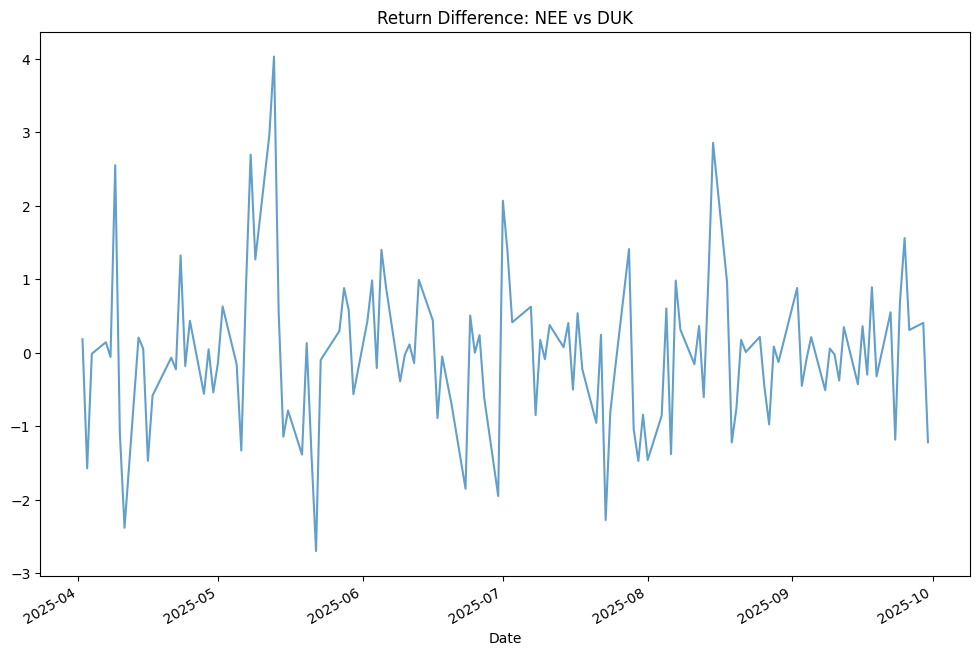

In [27]:
df_s = pd.DataFrame(data = standardized_data)
df_s = df_s[["NEE", "DUK"]]
df_s["difference"] = df_s["NEE"] - df_s["DUK"]
df_s["difference"].plot(figsize=(12, 8), title='Return Difference: NEE vs DUK', alpha=0.7)
plt.show()

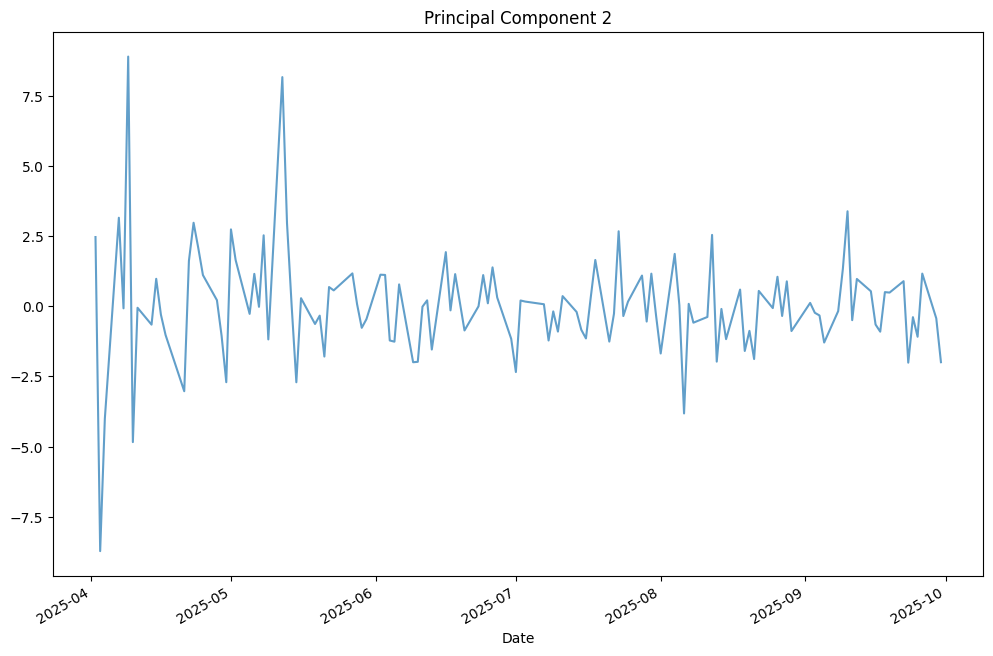

In [28]:
pc2_scores = principal_components.iloc[:, 1]
correlations = {}
for i, stock in enumerate(holding_daily_returns.columns):
    corr = np.corrcoef(standardized_data.iloc[:, i], pc1_scores)[0,1]
    correlations[stock] = corr
    
    
# Draw the graph for PC_2
pc2_scores.plot(figsize=(12, 8), title='Principal Component 2', alpha=0.7) # Plot the yields
plt.show()

In [30]:
print("\n The return difference of stocks NEE and DUK follows a similar pattern as PC2. This is because there is a common factor influence the return gap among these stocks, reflecting specific risks and opportunities for these stocks")
print("\n The correlation matrix \n", np.corrcoef(principal_components["PC_2"], df_s["difference"]))
print("\n The correlation of the return differnce with PC2 is also low at 40% showing the explainability of PC2 Stocks in the sector move together, so diversification within utilities is limited.")


 The return difference of stocks NEE and DUK follows a similar pattern as PC2. This is because there is a common factor influence the return gap among these stocks, reflecting specific risks and opportunities for these stocks

 The correlation matrix 
 [[1.         0.39985191]
 [0.39985191 1.        ]]

 The correlation of the return differnce with PC2 is also low at 40% showing the explainability of PC2 Stocks in the sector move together, so diversification within utilities is limited.


## 4f. Compute SVD

Here we compute SVD the matrix - (Standardized returns matrix)/(n-1) and show the following:

1) The square of the singular values obtained from SVD are the same as the eigenvalues of standardized returns covariance matrix as computed above (standardized_data.cov())
2) The transpose of right singular vectors obtained from SVD (V) are the same as the eigenvectors of standardized returns covariance matrix as computed above (standardized_data.cov())
3) The eigenvectors obtained from SVD (V) is then used for computing the principal components of Returns matrix and we can see this is the same as principal components computed earlier./

We can see then the PCA can be computed by SVD of manipulated Standardized returns matrix.

In [31]:
# Calculate covariance for standardized return matrix
import math

standardized_data_dvd_sqrt_n = (standardized_data/math.sqrt(len(standardized_data)-1))
standardized_data_cov = standardized_data_dvd_sqrt_n.T@standardized_data_dvd_sqrt_n
standardized_data_cov

Ticker,AEE,AEP,ATO,AWK,CEG,CMS,CNP,D,DTE,DUK,...,NRG,PCG,PEG,PNW,PPL,SO,SRE,VST,WEC,XEL
Ticker,,,,,,,,,,,,,,,,,,,,,
AEE,1.000000,0.809798,0.818259,0.639010,0.249537,0.856674,0.786851,0.765329,0.886210,0.803200,...,0.139033,0.518918,0.688585,0.886400,0.831927,0.820933,0.719043,0.163238,0.891781,0.776020
AEP,0.809798,1.000000,0.764699,0.699744,0.128970,0.801957,0.720916,0.656779,0.762217,0.859787,...,-0.029169,0.420122,0.548160,0.787624,0.781238,0.843439,0.557269,0.024914,0.808854,0.723875
ATO,0.818259,0.764699,1.000000,0.678324,0.202190,0.753773,0.725038,0.647963,0.808333,0.742095,...,0.049251,0.463190,0.609115,0.787821,0.802268,0.784154,0.676001,0.112344,0.811833,0.688872
AWK,0.639010,0.699744,0.678324,1.000000,-0.217882,0.709356,0.519916,0.540485,0.618502,0.774031,...,-0.340721,0.225152,0.263944,0.643768,0.595087,0.774232,0.283774,-0.325824,0.687167,0.567994
CEG,0.249537,0.128970,0.202190,-0.217882,1.000000,0.094051,0.275122,0.284132,0.263261,0.027673,...,0.679165,0.337085,0.617195,0.172069,0.197350,0.067269,0.475629,0.853956,0.244116,0.186830
CMS,0.856674,0.801957,0.753773,0.709356,0.094051,1.000000,0.717511,0.725603,0.891052,0.819173,...,-0.016810,0.443945,0.555104,0.831286,0.780507,0.821579,0.602787,0.015927,0.878890,0.766482
CNP,0.786851,0.720916,0.725038,0.519916,0.275122,0.717511,1.000000,0.624483,0.768962,0.724570,...,0.151635,0.400226,0.608774,0.701058,0.739902,0.714046,0.625588,0.152690,0.752508,0.666204
D,0.765329,0.656779,0.647963,0.540485,0.284132,0.725603,0.624483,1.000000,0.765667,0.683143,...,0.242791,0.540583,0.624765,0.746766,0.684392,0.744164,0.703748,0.240122,0.749038,0.643595
DTE,0.886210,0.762217,0.808333,0.618502,0.263261,0.891052,0.768962,0.765667,1.000000,0.781441,...,0.127555,0.494218,0.648826,0.833561,0.815244,0.798246,0.713110,0.166186,0.861544,0.786838


In [32]:
standardized_data_dvd_sqrt_n=(standardized_data/math.sqrt(len(standardized_data)-1))

# Use SVD to calculate eigenvectors and eigenvalues of the covariance matrix of standardized returns
U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_data_dvd_sqrt_n)

print("\nSquared Singular values (eigenvalues):")
print(s_st_return**2)
print("\nMatrix V (eigenvectors)")
print(VT_st_return.T)


Squared Singular values (eigenvalues):
[18.46496241  3.89139864  1.22281842  0.93747645  0.58775364  0.53251932
  0.40052269  0.37666747  0.34251019  0.29479801  0.28262032  0.26605123
  0.25884862  0.25140197  0.23257598  0.18780402  0.16487801  0.16091796
  0.14860517  0.14389344  0.12654482  0.12118277  0.100205    0.09633656
  0.0856032   0.07920991  0.07343677  0.06573811  0.05955721  0.04316169]

Matrix V (eigenvectors)
[[-2.20119542e-01 -4.24696097e-04 -3.99730696e-02  9.05789743e-04
  -2.81670807e-02  7.43092010e-02 -8.65433696e-02  3.37842813e-02
  -2.37268816e-01 -1.24489353e-01  7.01833000e-02  3.48731426e-02
   1.60446530e-01 -1.45338662e-01 -7.77806088e-02 -2.79469445e-02
   1.50367162e-01  5.83885969e-02  1.52444556e-02  4.50896415e-02
   2.78919860e-02  3.66727734e-02 -2.56761435e-01 -1.49018091e-01
   2.89202278e-01  1.12117741e-01  3.04412345e-01  4.35993197e-01
  -4.39676146e-01  3.35481608e-01]
 [-2.04324031e-01  1.01591140e-01 -8.70283877e-02 -8.95477242e-02
  -4.3

In [ ]:
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvectors

is_negative = np.allclose((s_st_return**2), eigenvalues, rtol=1e-05, atol=1e-04)
display(is_negative)
print("\n From the above, we can see that the eigenvalues computed for standardized covariance matrix is same as the squared singular values of SVD")
print("\n The same is true of eigenvectors and right singular vectors obtained from SVD")

principal_components_1 = standardized_data @ (VT_st_return.T)
display(principal_components_1)
display(principal_components)
print("\n We can see that the PCA computed using SVD is same as PCA arrived at using eigenvectors of standardized covariance matrix.")

True


 From the above, we can see that the eigenvalues computed for standardized covariance matrix is same as the squared singular values of SVD

 The same is true of eigenvectors and right singular vectors obtained from SVD


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-02,-0.569037,-2.469046,0.235334,-0.631166,0.018032,0.582522,-0.071405,0.244149,-0.130568,0.135749,...,-0.172472,0.191777,-0.006440,0.327576,0.264157,-0.228402,-0.144188,0.315094,0.184491,-0.175071
2025-04-03,-1.540392,8.727295,1.047585,0.971596,-1.021432,-1.405375,-0.632213,1.519909,0.163157,-0.514126,...,0.398304,-0.076578,0.391755,-0.710843,0.471156,-0.024426,-0.103818,0.642336,-0.236884,0.097043
2025-04-04,20.542376,4.005832,1.036260,-1.195777,0.495370,-0.200163,-0.019997,0.129768,0.357485,-0.202812,...,-0.453095,0.079700,-0.148587,0.437905,-0.289918,-0.063798,-0.259793,-0.624163,0.130287,-0.232006
2025-04-07,8.549686,-3.157621,-1.312556,-1.074484,-2.186228,-0.458855,-0.458073,-0.424348,-0.088244,0.005819,...,-0.832225,-0.374906,0.220679,-0.275136,-0.165051,-0.025911,0.171245,-0.321543,-0.214775,0.030775
2025-04-08,2.173291,0.072367,-1.504088,-1.671367,-1.006781,0.386675,0.581969,-0.080192,-0.545345,0.709070,...,-0.091569,-0.069026,-0.472153,0.245562,0.443316,0.883596,-0.005524,0.145664,-0.088060,0.279650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,-2.404199,0.387894,-0.485321,1.235589,-2.910165,1.096994,-0.430792,-0.631549,1.027001,-0.799886,...,-1.029351,-0.213389,0.277529,0.187341,-0.154267,0.270240,-0.300188,-0.127881,0.114936,0.095627
2025-09-25,3.841295,1.084792,0.425056,0.923817,-0.421914,0.108488,-0.115643,0.255314,-0.807206,1.032499,...,0.296976,0.512835,-1.111327,-0.148324,-0.024290,-0.143228,0.609990,0.293098,0.027201,0.111595
2025-09-26,-5.785265,-1.166222,0.774232,-0.342710,-0.861388,0.026122,0.229755,0.571852,-0.019183,-0.023160,...,0.237279,-0.068110,-0.817044,0.289867,-0.431828,-0.315814,-0.000144,-0.195307,-0.046080,0.047867


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-02,-0.569037,2.469046,0.235334,0.631166,-0.018032,-0.582522,0.071405,0.244149,-0.130568,-0.135749,...,0.264157,-0.327576,0.006440,-0.223658,-0.191777,-0.172472,-0.106038,-0.636127,-0.208908,0.250045
2025-04-03,-1.540392,-8.727295,1.047585,-0.971596,1.021432,1.405375,0.632213,1.519909,0.163157,0.514126,...,0.471156,0.710843,-0.391755,-0.168649,0.076578,0.398304,-0.344561,-0.104270,0.322363,0.011624
2025-04-04,20.542376,-4.005832,1.036260,1.195777,-0.495370,0.200163,0.019997,0.129768,0.357485,0.202812,...,-0.289918,-0.437905,0.148587,0.422318,-0.079700,-0.453095,0.287290,-0.285459,0.284579,-0.656459
2025-04-07,8.549686,3.157621,-1.312556,1.074484,2.186228,0.458855,0.458073,-0.424348,-0.088244,-0.005819,...,-0.165051,0.275136,-0.220679,-1.600148,0.374906,-0.832225,-0.594231,-0.257918,0.528223,0.429991
2025-04-08,2.173291,-0.072367,-1.504088,1.671367,1.006781,-0.386675,-0.581969,-0.080192,-0.545345,-0.709070,...,0.443316,-0.245562,0.472153,-0.072137,0.069026,-0.091569,0.733344,0.208974,-0.245060,0.306440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,-2.404199,-0.387894,-0.485321,-1.235589,2.910165,-1.096994,0.430792,-0.631549,1.027001,0.799886,...,-0.154267,-0.187341,-0.277529,0.172471,0.213389,-1.029351,0.267004,-0.406242,-0.017201,0.393845
2025-09-25,3.841295,-1.084792,0.425056,-0.923817,0.421914,-0.108488,0.115643,0.255314,-0.807206,-1.032499,...,-0.024290,0.148324,1.111327,0.282379,-0.512835,0.296976,0.046408,0.095483,-0.279182,0.231715
2025-09-26,-5.785265,1.166222,0.774232,0.342710,0.861388,-0.026122,-0.229755,0.571852,-0.019183,0.023160,...,-0.431828,-0.289867,0.817044,-0.013842,0.068110,0.237279,-0.420520,-0.410306,0.155588,-0.614574



 We can see that the PCA computed using SVD is same as PCA arrived at using eigenvectors of standardized covariance matrix. They only differ in negative sign
